# Mean-Variance Portfolio Optimization with MlFinLab 
## Abstract
The following notebook will explore MlFinLab's implementation of Harry Markowitz's modern portfolio theory. Users will be shown how they can construct optimal portfolios for different objective functions and also how to incorporate custom input in their calculations. 


## Introduction
This tutorial will show users how to optimize their portfolio using several mean-variance optimisation solutions provided through the MlFinLab Python library. Official documentation can be found __[at this link](https://mlfinlab.readthedocs.io/en/latest/portfolio_optimisation/mean_variance.html)__. The mean-variance optimisation class from MLFinLab utilizes techniques based on Harry Markowtiz's methods for calculating efficient frontier solutions. More detailed information on Modern Portfolio Theory and the efficient frontier can be found __[here](https://en.wikipedia.org/wiki/Modern_portfolio_theory)__. Through the MlFinLab library, users can generate optimal portfolio solutions for different objective functions, including:

1. **Inverse Variance**: the diagonal of the covariance matrix is used for weight allocation
2. **Minimum Volatility**: the objective is to generate a portfolio with the least variance
3. **Maximum Sharpe Ratio**: the objective is to maximize the Sharpe Ratio of the portfolio
4. **Efficient Risk**: the objective is to minimize risk for a given target return value
5. **Efficient Return**: the objective is to maximize the portfolio return given a target risk value 
6. **Maximum Return - Minimum Volatility**: the objective is to minimize the risk and maximize the return
7. **Maximum Diversification**: the portfolio tries to diversify allocation across as many assets as possible
8. **Maximum Decorrelation**: the objective is to minimize the correlation between the assets of a portfolio

In [2]:
# importing our required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlfinlab.portfolio_optimization.mean_variance import MeanVarianceOptimisation

## The Data
In this tutorial, we will be working with the historical closing prices for 17 assets. The sample data that we are using can be found [at this link](https://github.com/hudson-and-thames/research/blob/master/Sample-Data/assetalloc.csv).

In [3]:
# preparing our data
raw_prices = pd.read_csv('assetalloc.csv', sep=';', parse_dates=True, index_col='Dates')
stock_prices = raw_prices.sort_values(by='Dates')
stock_prices.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB
Dates,,,,,,,,,,,,,,,,,
1989-01-02,2039.7,875.47,297.09,392.50,99.081,99.039,99.572,100.000,100.031,100.345,101.080,101.936,154.38,117.50,1636.57,133.584,286.67
1989-01-03,2021.3,859.83,287.11,384.25,97.703,97.017,96.441,93.833,99.374,98.584,98.410,97.990,154.67,116.57,1696.35,142.080,286.00
1989-01-05,2118.0,900.64,309.12,378.25,98.253,99.113,99.275,97.634,99.715,99.561,99.965,99.950,164.29,127.22,1737.26,184.354,283.30
1989-01-06,2103.4,924.65,321.97,362.00,97.643,98.640,98.788,96.555,100.488,101.549,103.140,104.156,172.40,129.53,1724.29,187.731,279.96
1989-01-08,2292.3,1006.38,343.75,368.75,98.506,100.479,102.162,102.822,102.457,106.041,108.903,113.106,174.21,134.62,1775.39,173.067,277.31


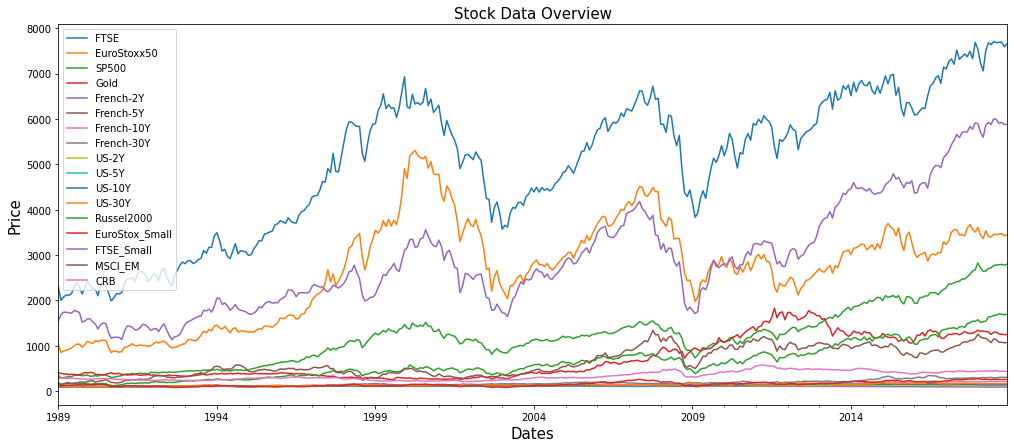

In [4]:
# Taking a quick look at our most recent 5000 data points
stock_prices.resample('M').last().plot(figsize=(17,7))
plt.ylabel('Price', size=15)
plt.xlabel('Dates', size=15)
plt.title('Stock Data Overview', size=15)
plt.show()

## Inverse-Variance Portfolio
In order to calculate the asset weights of the inverse-variance portfolio, we will need to create a new MeanVarianceOptimisation object and use the allocate method. More information on inverse-variance solutions can be found __[here](https://en.wikipedia.org/wiki/Inverse-variance_weighting)__.

Note that the allocate method requires three parameters to run: 
1. asset_names (a list of strings containing the asset names)
2. asset_prices (a dataframe of historical asset prices - daily close)
3. solution (the type of solution/algorithm to use to calculate the weights)

Instead of providing historical asset prices, users can also provide the expected asset returns along with a covariance matrix of asset returns. There is also much more customizability within the allocation method in which we will explore later in this notebook. For simplicity, we will show users how to create an optimal portfolio under the Inverse Variance portfolio solution. If users wish to create a different optimized portfolio, all that must be changed is the 'solution' parameter string. The corresponding solution strings and portfolio solutions can be found at the [official documentation](https://mlfinlab.readthedocs.io/en/latest/portfolio_optimisation/mean_variance.html).

In [5]:
# creating our portfolio weights under the correct objective function
mvoIV = MeanVarianceOptimisation()
mvoIV.allocate(asset_names=stock_prices.columns,
               asset_prices=stock_prices,
               solution='inverse_variance')

print("Inverse-Variance Portfolio Weights \n", mvoIV.weights)

Inverse-Variance Portfolio Weights 
        FTSE  EuroStoxx50     SP500      Gold  French-2Y  French-5Y  \
0  0.005469     0.003034  0.004589  0.005522   0.393198     0.0884   

   French-10Y  French-30Y     US-2Y     US-5Y    US-10Y   US-30Y  Russel2000  \
0    0.030693    0.009474  0.350092  0.059342  0.023356  0.00774    0.003019   

   EuroStox_Small  FTSE_Small   MSCI_EM       CRB  
0        0.002672    0.002824  0.001532  0.009045  


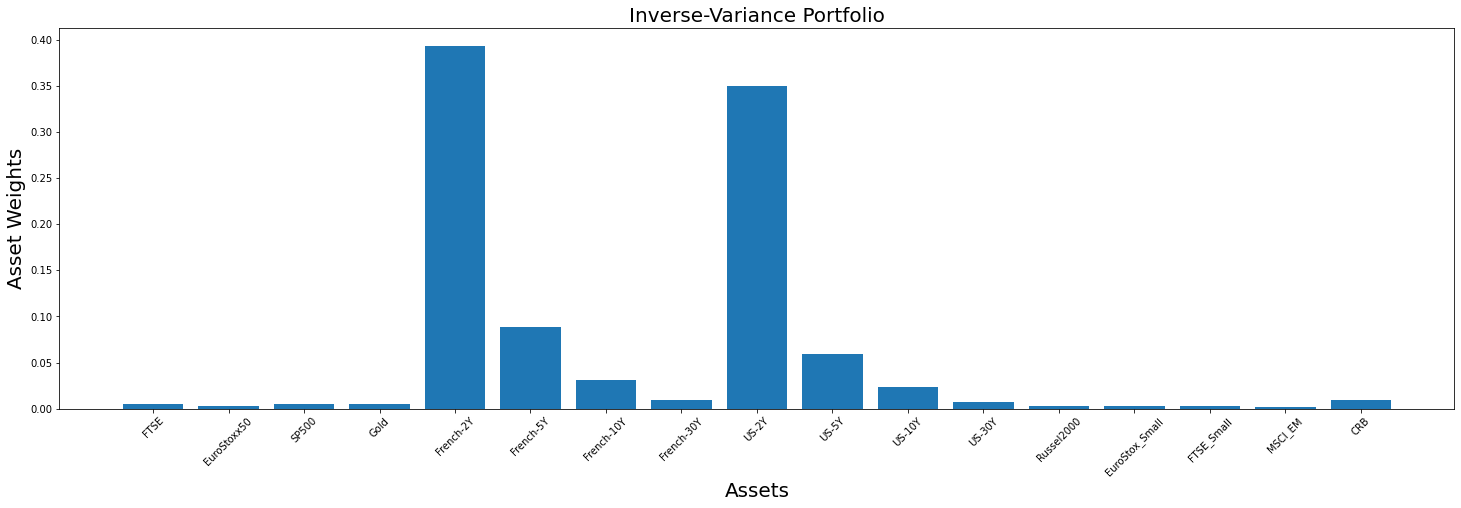

In [6]:
# plotting our optimal portfolio
IV_weights = mvoIV.weights
y_pos = np.arange(len(IV_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(IV_weights.columns), IV_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('Inverse-Variance Portfolio', size=20)
plt.show()

## Custom Input from Users
While MlFinLab provides many of the required calculations when constucting optimal portfolios, users also have the choice to provide custom input for their calculations. Instead of providing the raw historical closing prices for their assets, users can input a covariance matrix of asset returns and the expected asset returns to calculate their optimal portfolio. If you would like to learn more about the customizbility within MLFinLab's MVO implementation, please refer to the __[official documentation](https://mlfinlab.readthedocs.io/en/latest/portfolio_optimisation/mean_variance.html)__.

The following parameters in the allocate() method are utilized in order to do so:
1. 'covariance_matrix': (pd.DataFrame/NumPy matrix) A covariance matrix of asset returns
2. 'expected_asset_returns: (list) A list of mean asset returns

To make some of the necessary calculations, we will make use of the ReturnsEstimators class provided by MLFinLab.

In [9]:
# Importing ReturnsEstimation class from MLFinLab
from mlfinlab.portfolio_optimization.returns_estimators import ReturnsEstimators

In [10]:
# Calculating our asset returns in order to calculate our covariance matrix
returns = ReturnsEstimators.calculate_returns(stock_prices)
returns.head()

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB
Dates,,,,,,,,,,,,,,,,,
1989-01-03,-0.009021,-0.017865,-0.033593,-0.021019,-0.013908,-0.020416,-0.031445,-0.061670,-0.006568,-0.017549,-0.026415,-0.038711,0.001878,-0.007915,0.036528,0.063600,-0.002337
1989-01-05,0.047840,0.047463,0.076661,-0.015615,0.005629,0.021604,0.029386,0.040508,0.003431,0.009910,0.015801,0.020002,0.062197,0.091361,0.024116,0.297537,-0.009441
1989-01-06,-0.006893,0.026659,0.041570,-0.042961,-0.006208,-0.004772,-0.004906,-0.011051,0.007752,0.019968,0.031761,0.042081,0.049364,0.018158,-0.007466,0.018318,-0.011790
1989-01-08,0.089807,0.088390,0.067646,0.018646,0.008838,0.018644,0.034154,0.064906,0.019594,0.044235,0.055876,0.085929,0.010499,0.039296,0.029635,-0.078112,-0.009466
1989-01-09,0.050255,0.034281,0.029033,-0.026441,-0.004233,-0.006559,-0.006392,-0.014802,-0.014816,-0.025999,-0.029981,-0.036629,0.025831,0.048953,-0.004788,0.029382,-0.000288


In [11]:
# Calculating our covariance matrix
cov = returns.cov()
cov

,FTSE,EuroStoxx50,SP500,Gold,French-2Y,French-5Y,French-10Y,French-30Y,US-2Y,US-5Y,US-10Y,US-30Y,Russel2000,EuroStox_Small,FTSE_Small,MSCI_EM,CRB
FTSE,0.001792,0.002042,0.001628,0.000102,-0.000030,0.000012,0.000065,0.000097,-0.000043,-0.000090,-0.000113,-0.000201,0.001872,0.001904,0.001928,0.002283,0.000461
EuroStoxx50,0.002042,0.003230,0.002128,-0.000039,-0.000053,-0.000037,0.000013,0.000037,-0.000093,-0.000210,-0.000283,-0.000444,0.002436,0.002977,0.002567,0.002999,0.000564
SP500,0.001628,0.002128,0.002135,0.000055,-0.000058,-0.000010,0.000046,0.000035,-0.000038,-0.000085,-0.000109,-0.000231,0.002265,0.001967,0.001961,0.002508,0.000598
Gold,0.000102,-0.000039,0.000055,0.001774,-0.000011,0.000012,0.000024,0.000021,0.000026,0.000082,0.000113,0.000104,0.000125,0.000246,0.000183,0.001070,0.000501
French-2Y,-0.000030,-0.000053,-0.000058,-0.000011,0.000025,0.000037,0.000042,0.000058,0.000011,0.000024,0.000034,0.000053,-0.000066,-0.000081,-0.000067,-0.000093,-0.000048
French-5Y,0.000012,-0.000037,-0.000010,0.000012,0.000037,0.000111,0.000171,0.000262,0.000030,0.000079,0.000129,0.000209,-0.000037,-0.000085,-0.000050,-0.000111,-0.000076
French-10Y,0.000065,0.000013,0.000046,0.000024,0.000042,0.000171,0.000319,0.000530,0.000047,0.000137,0.000244,0.000423,-0.000003,-0.000049,-0.000027,-0.000121,-0.000117
French-30Y,0.000097,0.000037,0.000035,0.000021,0.000058,0.000262,0.000530,0.001034,0.000072,0.000228,0.000427,0.000795,-0.000036,-0.000072,-0.000090,-0.000278,-0.000248
US-2Y,-0.000043,-0.000093,-0.000038,0.000026,0.000011,0.000030,0.000047,0.000072,0.000028,0.000062,0.000084,0.000115,-0.000065,-0.000120,-0.000108,-0.000100,-0.000036
US-5Y,-0.000090,-0.000210,-0.000085,0.000082,0.000024,0.000079,0.000137,0.000228,0.000062,0.000165,0.000249,0.000371,-0.000169,-0.000273,-0.000243,-0.000244,-0.000102


In [13]:
# Calculating our mean asset returns
mean_returns = ReturnsEstimators.calculate_mean_historical_returns(stock_prices)
mean_returns

FTSE              0.264280
EuroStoxx50       0.433313
SP500             0.335210
Gold              0.260800
French-2Y        -0.000044
French-5Y         0.027392
French-10Y        0.064993
French-30Y        0.167084
US-2Y             0.010230
US-5Y             0.032652
US-10Y            0.064161
US-30Y            0.174726
Russel2000        0.481756
EuroStox_Small    0.460265
FTSE_Small        0.449934
MSCI_EM           0.792658
CRB               0.143230
dtype: float64

In [25]:
# From here, we can now create our portfolio
mvo_custom = MeanVarianceOptimisation()
mvo_custom.allocate(asset_names=stock_prices.columns,
                    expected_asset_returns=mean_returns,
                    covariance_matrix=cov,
                    solution='efficient_risk')

print("Custom MVO Portfolio - Efficient Risk \n", mvo_custom.weights)

Custom MVO Portfolio - Efficient Risk 
            FTSE  EuroStoxx50         SP500      Gold  French-2Y  French-5Y  \
0  6.755138e-17     0.035077  3.726956e-16  0.089307    0.35375        0.0   

   French-10Y  French-30Y     US-2Y         US-5Y        US-10Y    US-30Y  \
0         0.0    0.015499  0.093085  3.506308e-16  2.929027e-16  0.224259   

   Russel2000  EuroStox_Small  FTSE_Small   MSCI_EM       CRB  
0    0.066823             0.0    0.020045  0.096941  0.005213  


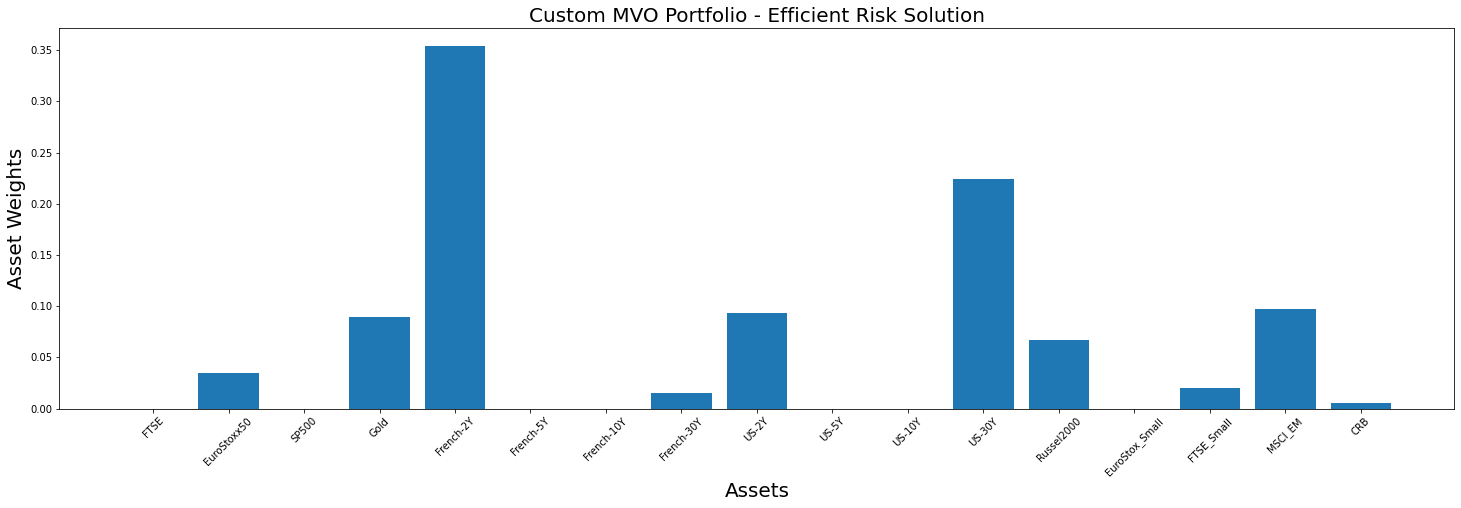

In [26]:
# plotting our optimal portfolio
custom_weights = mvo_custom.weights
y_pos = np.arange(len(custom_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(custom_weights.columns), custom_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('Custom MVO Portfolio - Efficient Risk Solution', size=20)
plt.show()

## Custom Portfolio Allocation with a Custom Objective Function
MlFinLab also provides a way for users to create their custom portfolio problem. **This includes complete flexibility to specify the input, optimization variables, objective function, and the corresponding constraints.** In this section, we will work through how to build a custom portfolio allocation with a custom objective function. 

### The Quadratic Optimizer
In order to solve our mean-variance objective functions, we use [cvxpy](https://www.cvxpy.org/index.html) instead of the more frequently used [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html). This choice was made for a few reasons in particular:
1. The documentation of cvxpy is more understandable than that of scipy
2. cvxpy's code is much more readable and easier to understand
3. cvxpy raises clear error notifications if the problem we are attempting to solve is not convex and the required conditions are not met

Working with cvxpy through the MlFinLab library, we can create our own convex optimization function to solve for portfolio allocation. In order to build this custom portfolio, we must follow the general steps:
1. Specifying our input variables not related to cvxpy
2. Specifying our cvxpy specific variables
3. Specifying our objective function
4. (Optional) Specifying the constrains for our optimization problem

### Specifying our variables not related to cvxpy
In this step we must specify our input variables not related to cvxpy (i.e. not defined as cvxpy variable objects). This can include anything ranging from raw asset prices data to historical returns to integer or string variables. All data types are supported in this step - int, float, str, Numpy matrices/lists, Python lists, Pandas DataFrame). 

In [20]:
non_cvxpy_variables = {
    'asset_prices': stock_prices,
    'num_assets': stock_prices.shape[1],
    'covariance': stock_prices.cov(),
    'asset_names': stock_prices.columns,
    'expected_returns': mean_returns
}

### Specifying our cvxpy specific variables
The second step is to specify the cvxpy specific variables which are declared in the syntax required by cvxpy. You can include as many new variables as you need by initialising a simple Python list with each declaration being a string. **Each of these variables should be a cvxpy.Variable object.**

In [21]:
cvxpy_variables = [
        'risk = cp.quad_form(weights, covariance)',
        'portfolio_return = cp.matmul(weights, expected_returns)'
]

Here, we are declaring two new cvxpy variables - 'risk' and 'portfolio_return'. Note that we are using non-cvxpy variables - 'covariance' and 'expected_returns' - declared in the previous step to initialise the new ones.

### Specifying our objective function
The third step is to specify the objective function for our portfolio optimization problem. You need to simply pass a string form of the Python code for the objective function.

In [22]:
custom_obj = 'cp.Minimize(risk)'

### Specifying the constraints for our optimization problem
This is an optional step which requires you to specify the constraints for your optimization problem. Similar to how we specified cvxpy variables, the constraints need to be specified as a Python list with each constraint being a string representation.

In [23]:
constraints = ['cp.sum(weights) == 1', 'weights >= 0', 'weights <= 1']

Piecing our four parts together, we can now build our custom portfolio allocation. 

In [28]:
mvo_custom_portfolio = MeanVarianceOptimisation()
mvo_custom_portfolio.allocate_custom_objective(non_cvxpy_variables=non_cvxpy_variables,
                                               cvxpy_variables=cvxpy_variables,
                                               objective_function=custom_obj,
                                               constraints=constraints)
print(mvo_custom_portfolio.weights)

           FTSE  EuroStoxx50         SP500          Gold  French-2Y  \
0  4.422390e-22          0.0  5.790261e-21  1.811906e-20   0.871929   

      French-5Y    French-10Y    French-30Y     US-2Y         US-5Y  \
0  1.085177e-20  1.567146e-20  2.014257e-20  0.095388  1.673946e-20   

         US-10Y        US-30Y    Russel2000  EuroStox_Small    FTSE_Small  \
0  1.671418e-20  1.642267e-20  1.271356e-20        0.032683  2.010269e-21   

        MSCI_EM           CRB  
0  1.104286e-20  2.696832e-20  


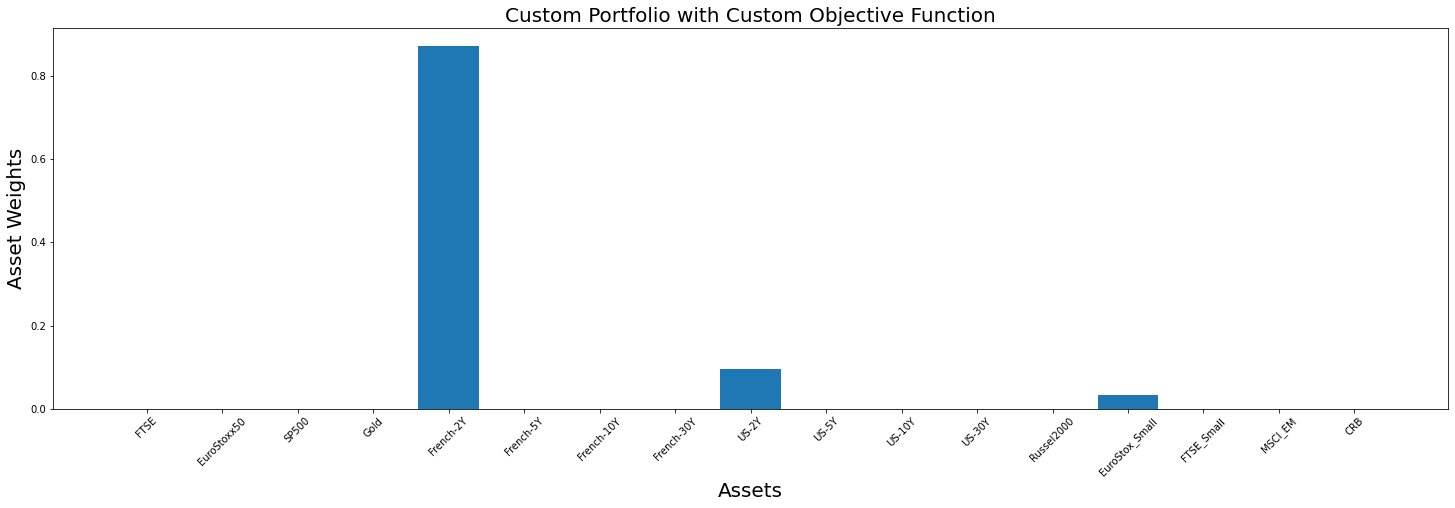

In [29]:
# plotting our optimal portfolio
mvo_custom_weights = mvo_custom_portfolio.weights
y_pos = np.arange(len(mvo_custom_weights.columns))

plt.figure(figsize=(25,7))
plt.bar(list(mvo_custom_weights.columns), mvo_custom_weights.values[0])
plt.xticks(y_pos, rotation=45, size=10)
plt.xlabel('Assets', size=20)
plt.ylabel('Asset Weights', size=20)
plt.title('Custom Portfolio with Custom Objective Function', size=20)
plt.show()

## Conclusion
Throughout this notebook, users were shown how they can build optimal portfolios through the MlFinLab library. Users saw how they can utilize the mean-variance optimisation algorithms and also the several different solution strings supported. Additionally, we worked through how we can build out custom portfolios with custom objective functions as well.

## Sources
- [MlFinLab Documentation](https://mlfinlab.readthedocs.io/en/latest/portfolio_optimisation/mean_variance.html)